In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance, plot_tree
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [10]:
plt.rcParams['font.sans-serif']=['Microsoft Jhenghei']
plt.rcParams['axes.unicode_minus']=False


In [2]:
df = pd.read_csv("../data/traindrug.csv", encoding="utf8")

In [3]:
df.head()

,性別,教育,神智,年齡,每月採尿平均,實際保管長度,違規次數,獎勵次數,犯次,一年內次數,二年內次數,三年內次數,四年內次數,五年內次數,首犯年齡,再犯註記
0,1,4,3,3,2.333,1,0,0,5,0,0,0,3,4,0,0
1,1,3,2,3,0.000,1,0,0,2,0,0,0,1,0,0,0
2,1,3,2,3,1.000,3,0,2,4,0,0,0,0,0,1,0
3,1,3,0,4,1.714,1,0,0,5,0,0,0,0,0,1,1
4,1,3,0,3,0.871,4,0,1,2,0,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65402 entries, 0 to 65401
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性別      65402 non-null  int64  
 1   教育      65402 non-null  int64  
 2   神智      65402 non-null  int64  
 3   年齡      65402 non-null  int64  
 4   每月採尿平均  65402 non-null  float64
 5   實際保管長度  65402 non-null  int64  
 6   違規次數    65402 non-null  int64  
 7   獎勵次數    65402 non-null  int64  
 8   犯次      65402 non-null  int64  
 9   一年內次數   65402 non-null  int64  
 10  二年內次數   65402 non-null  int64  
 11  三年內次數   65402 non-null  int64  
 12  四年內次數   65402 non-null  int64  
 13  五年內次數   65402 non-null  int64  
 14  首犯年齡    65402 non-null  int64  
 15  再犯註記    65402 non-null  int64  
dtypes: float64(1), int64(15)
memory usage: 8.0 MB


**資料編碼參考結案報告表7**

In [22]:
urn=df.每月採尿平均
urn.describe()

count    65402.000000
mean         1.411625
std          1.093908
min          0.000000
25%          0.667000
50%          1.286000
75%          2.000000
max         10.000000
Name: 每月採尿平均, dtype: float64

<AxesSubplot:ylabel='Density'>

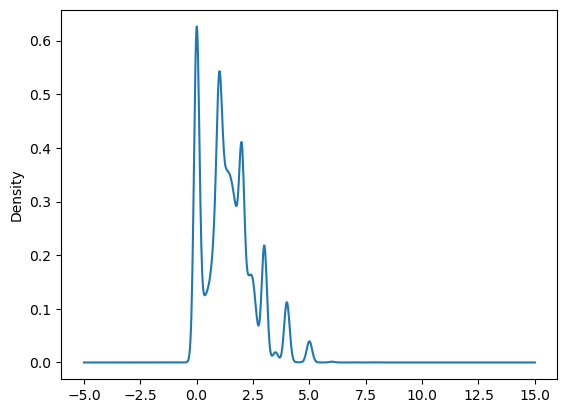

In [72]:
urn.plot.kde()

C:\Users\User\AppData\Local\Temp\ipykernel_11872\3174808323.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r')


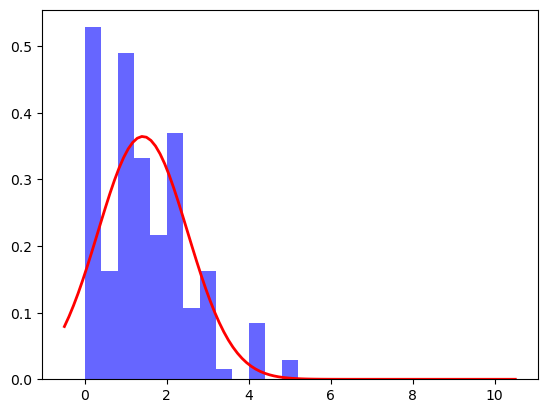

In [89]:
from scipy.stats import norm
plt.hist(urn, bins=25, density=True, alpha=0.6, color='b')
mu, std = norm.fit(urn)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='r')

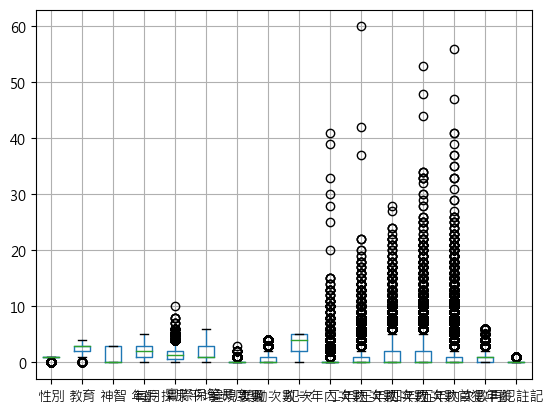

In [6]:
plt.show()

In [21]:
df[['四年內次數']].boxplot()

<AxesSubplot:>

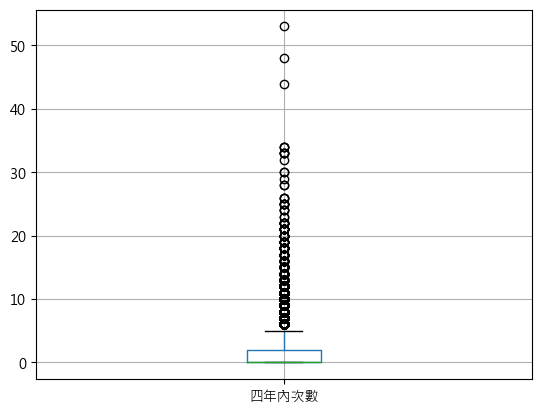

In [22]:
plt.show()

In [12]:
df.columns

Index(['性別', '教育', '神智', '年齡', '每月採尿平均', '實際保管長度', '違規次數', '獎勵次數', '犯次',
       '一年內次數', '二年內次數', '三年內次數', '四年內次數', '五年內次數', '首犯年齡', '再犯註記'],
      dtype='object')

In [28]:
df[df['二年內次數']>20]

,性別,教育,神智,年齡,每月採尿平均,實際保管長度,違規次數,獎勵次數,犯次,一年內次數,二年內次數,三年內次數,四年內次數,五年內次數,首犯年齡,再犯註記
42487,1,1,2,3,1.833,1,0,1,4,0,42,4,0,0,3,0
53595,1,1,3,1,3.000,1,0,0,5,2,22,4,4,0,1,0
60352,1,4,3,0,0.000,1,0,0,5,0,37,2,3,1,0,0
60666,1,2,0,0,0.000,1,0,0,1,1,22,1,1,0,0,1
61352,1,4,3,1,1.000,1,0,0,5,0,60,3,0,0,1,0
63363,1,3,3,0,1.000,6,0,0,5,1,22,0,0,0,0,0


In [49]:
df['四年內次數'].hist(bins=30)

<AxesSubplot:>

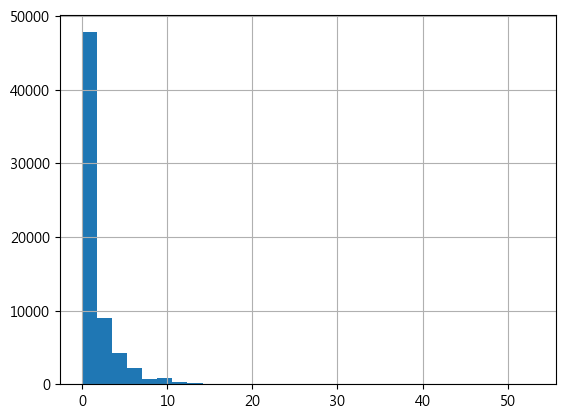

In [50]:
plt.show()

In [56]:
df.shape

(65402, 16)

In [6]:
nnn=df.groupby('再犯註記')

In [7]:
nnn.size()

再犯註記
0    53906
1    11496
dtype: int64

<AxesSubplot:xlabel='再犯註記'>

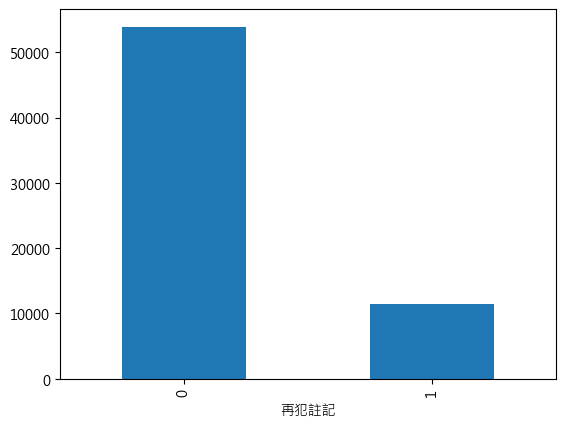

In [11]:
nnn.size().plot.bar()

Text(0.5, 0, '再犯註記(1:再犯，0:非再犯)')

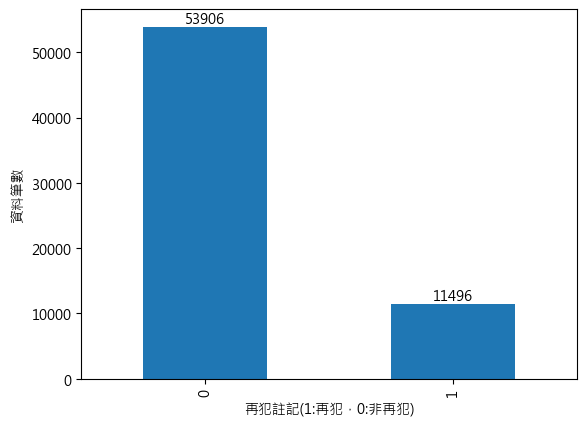

In [21]:
ax = nnn.size().plot.bar()
ax.bar_label(ax.containers[0]) #顯示bar的資料數據 
ax.set_ylabel("資料筆數") #設定y軸標籤
ax.set_xlabel("再犯註記(1:再犯，0:非再犯)") #設定y軸標籤

In [24]:
X = df.drop(labels=['再犯註記'], axis=1).values

In [26]:
X

array([[1., 4., 3., ..., 3., 4., 0.],
       [1., 3., 2., ..., 1., 0., 0.],
       [1., 3., 2., ..., 0., 0., 1.],
       ...,
       [1., 3., 0., ..., 0., 0., 0.],
       [0., 3., 0., ..., 2., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.]])

In [27]:
y = df['再犯註記'].values

In [28]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
xgbModel = XGBClassifier(
        n_estimators=7000, 
        learning_rate= 0.003, 
        max_depth=9,
        min_child_weight=0,
        gamma=0,                                      
        subsample=0.5,                               
        colsample_bytree=0.9,                         
        objective= 'binary:logistic',
        scale_pos_weight=1,                         
        seed=1440
)  

In [34]:
scores = cross_val_score(xgbModel, train_X, train_y, cv=5, scoring='accuracy')

In [36]:
xgbModel.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.003, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=7000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
scores.mean()

0.8449379155945769

In [38]:
train_pred = xgbModel.predict(train_X)

In [40]:
test_pred = xgbModel.predict(test_X)

In [41]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
t1 = xgbModel.score(train_X, train_y)

In [46]:
t1

0.899963685709371

In [47]:
t3 = xgbModel.score(test_X, test_y)

In [48]:
t3

0.8412200902071707

In [49]:
t4 = f1_score(train_y, train_pred)

In [50]:
t4

0.6322372119168072

In [51]:
t5 = f1_score(test_y, test_pred)

In [52]:
t5

0.37155824508320723

In [53]:
t6 = precision_score(train_y, train_pred)

In [54]:
t6

0.8866771777690186

In [55]:
t7 = precision_score(test_y, test_pred)

In [56]:
t7

0.6349534643226473

In [58]:
train_proba = xgbModel.predict_proba(train_X)[:, 1]

In [59]:
test_proba = xgbModel.predict_proba(test_X)[:, 1]

In [61]:
t8 = roc_auc_score(train_y, train_proba)

In [62]:
t8

0.9402064545274392

In [63]:
t9 = roc_auc_score(test_y, test_proba)

In [64]:
t9

0.7748770022885572

In [65]:
retList = [t1, scores.mean(), t3, t4, t5, t6, t7, t8, t9]

In [66]:
retList

[0.899963685709371,
 0.8449379155945769,
 0.8412200902071707,
 0.6322372119168072,
 0.37155824508320723,
 0.8866771777690186,
 0.6349534643226473,
 0.9402064545274392,
 0.7748770022885572]

In [73]:
names = ["total accuracy", "cv accuracy", "test accuracy", "train F1", "test F1", "train precision", "test precision", "train roc_auc", "test roc_auc"]

In [74]:
retdf = pd.DataFrame(retList, index=names)

In [75]:
retdf

,0
total accuracy,0.899964
cv accuracy,0.844938
test accuracy,0.841220
train F1,0.632237
test F1,0.371558
train precision,0.886677
test precision,0.634953
train roc_auc,0.940206
test roc_auc,0.774877


In [76]:
fcolumns=['性別', '教育', '神智', '年齡', '每月採尿平均', '實際保管長度', '違規次數', '獎勵次數', '犯次',
       '一年內次數', '二年內次數', '三年內次數', '四年內次數', '五年內次數', '首犯年齡']

In [77]:
factImportance = pd.DataFrame({'feature':fcolumns,
                              'importance': xgbModel.feature_importances_}).sort_values('importance', ascending=False)

In [78]:
factImportance

,feature,importance
8,犯次,0.138105
5,實際保管長度,0.102236
4,每月採尿平均,0.074484
9,一年內次數,0.072342
2,神智,0.062089
10,二年內次數,0.060450
12,四年內次數,0.060215
11,三年內次數,0.060192
13,五年內次數,0.058911
7,獎勵次數,0.058015


In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, test_pred)

In [80]:
cm

array([[10390,   353],
       [ 1724,   614]], dtype=int64)